In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
np.random.normal(0, 1, 50)

array([-0.96734839, -0.78353117, -1.53718848, -1.82905678, -0.61417653,
       -0.19015864,  1.19409246, -0.36843069, -1.58765222,  1.53310666,
        0.89662071,  0.11504325, -0.25585479, -0.85042381, -0.04083709,
        0.35157385, -0.29824401,  0.10488028,  0.59753174,  2.28432485,
        0.14537324, -0.37427689, -0.79828452,  0.20566116,  0.32879221,
        0.12513758,  0.03815722, -0.46278553, -0.42564302,  0.35622938,
        0.59021311, -0.62230005,  1.27114858, -0.23042148,  1.03194472,
        0.80564141, -0.0833831 , -0.44544633, -1.00630551, -0.4737171 ,
       -0.28017721, -0.42846435, -0.75573709,  0.15266839, -0.2397448 ,
       -0.26109401, -0.0542487 , -1.17705198, -1.02474063, -1.48315156])

In [3]:
pd.read_csv??

In [4]:
df = pd.read_csv('wage.csv', index_col=0)
df.columns

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [5]:
print(plt.style.available)
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [6]:
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [7]:
df_edu_wage = df.pivot(columns='education', values='wage')

In [8]:
df_edu_wage

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
7373,65.110854,NaN,NaN,NaN,NaN
7381,NaN,86.042801,NaN,NaN,NaN
7401,NaN,96.370653,NaN,NaN,NaN
7412,NaN,90.481913,NaN,NaN,NaN
7415,NaN,81.283253,NaN,NaN,NaN
...,...,...,...,...,...
453746,NaN,NaN,NaN,141.775172,NaN
453835,NaN,64.351025,NaN,NaN,NaN
453840,NaN,97.471006,NaN,NaN,NaN
453852,NaN,75.355679,NaN,NaN,NaN


In [9]:
df.wage

231655     75.043154
86582      70.476020
161300    130.982177
155159    154.685293
11443      75.043154
             ...    
376816    154.685293
302281     99.689464
10033      66.229408
14375      87.981033
453557     90.481913
Name: wage, Length: 3000, dtype: float64

In [10]:
import statsmodels.api as sm


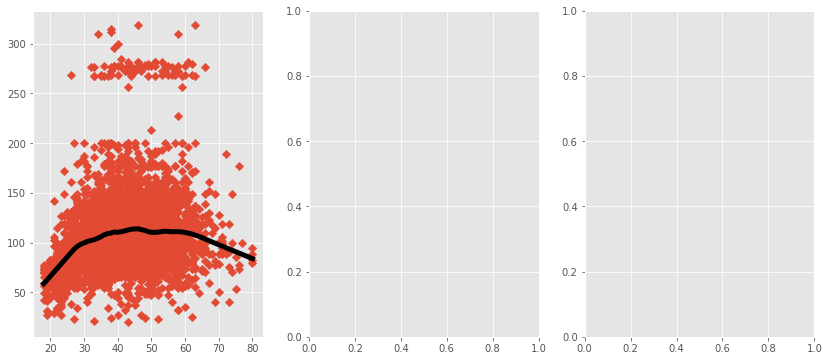

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

ax[0].scatter(df['age'], df['wage'], marker='D')
lowess = sm.nonparametric.lowess(df['wage'], df['age'], frac=0.2)
ax[0].plot(lowess[:, 0], lowess[:, 1], c='black', lw=5)


In [12]:
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


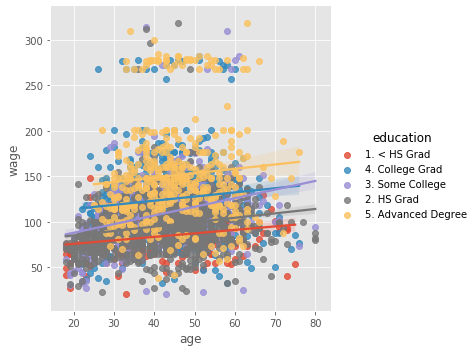

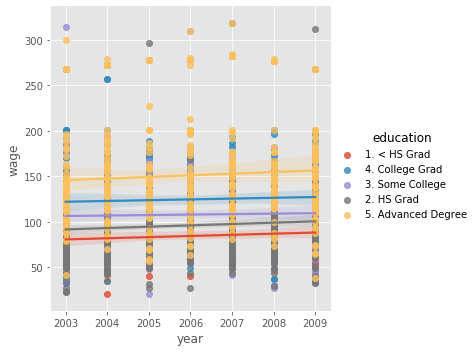

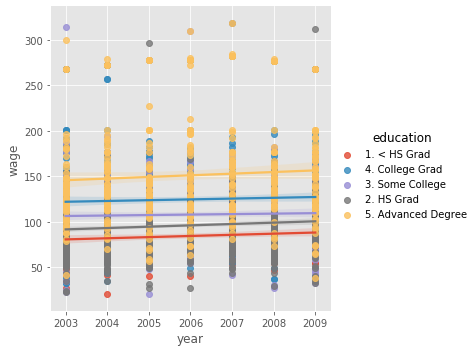

In [13]:

sns.lmplot(x='age', y='wage', data=df, hue='education')
sns.lmplot(x='year', y='wage', data=df, ci=100, hue='education')
sns.lmplot(x='year', y='wage', data=df, x_ci=10, hue='education')

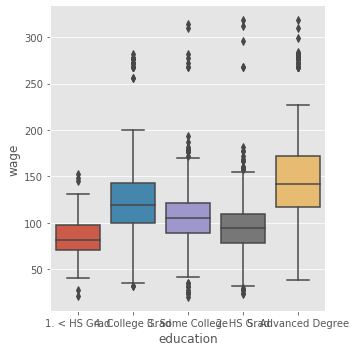

In [14]:
sns.catplot(x='education', y='wage', data=df, kind='box')

In [15]:
df_melt = pd.melt(df, id_vars=['education', 'wage'], value_vars='age')

In [16]:
df_melt

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50
...,...,...,...,...
2995,3. Some College,154.685293,age,44
2996,2. HS Grad,99.689464,age,30
2997,1. < HS Grad,66.229408,age,27
2998,3. Some College,87.981033,age,27


In [17]:
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
376816,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
302281,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
10033,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [18]:
df1 = df[['education', 'wage', 'year', 'age']]

In [19]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [20]:
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,year,2006
1,4. College Grad,70.476020,year,2004
2,3. Some College,130.982177,year,2003
3,4. College Grad,154.685293,year,2003
4,2. HS Grad,75.043154,year,2005


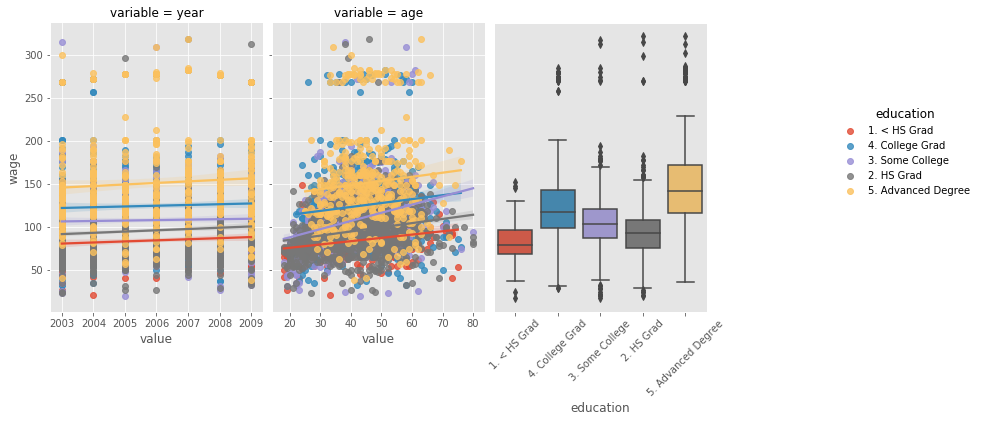

In [21]:
seaborn_grid = sns.lmplot(x='value', y='wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)
left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left_2, bottom_2, width_2, hegith_2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left_2 - left
seaborn_grid.fig.add_axes((left_2+left_diff, bottom, width, height))
sns.boxplot(x='education', y='wage', data=df, ax=seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.yaxis.set_visible(False)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor((1.2, 0.5, 0.5, 0.5))

In [22]:
leg

In [23]:
left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left_2, bottom_2, width_2, hegith_2 = seaborn_grid.fig.axes[1]._position.bounds

In [24]:
height

0.8011111111111109

In [25]:
bottom

0.12444444444444447

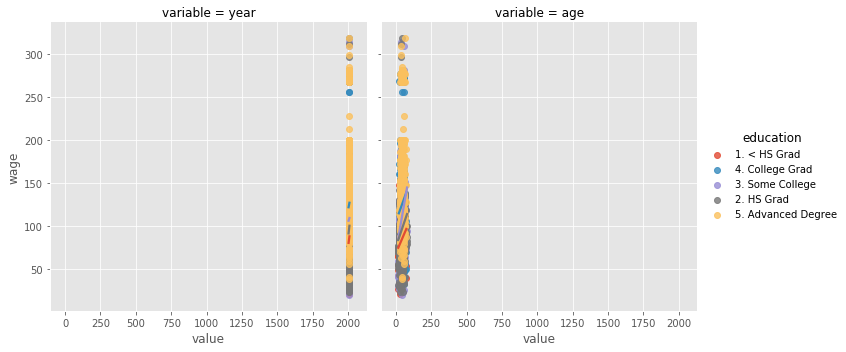

In [26]:
seaborn_grid = sns.lmplot(x='value', y='wage', col='variable', hue='education', data=df_melt, sharex=True)

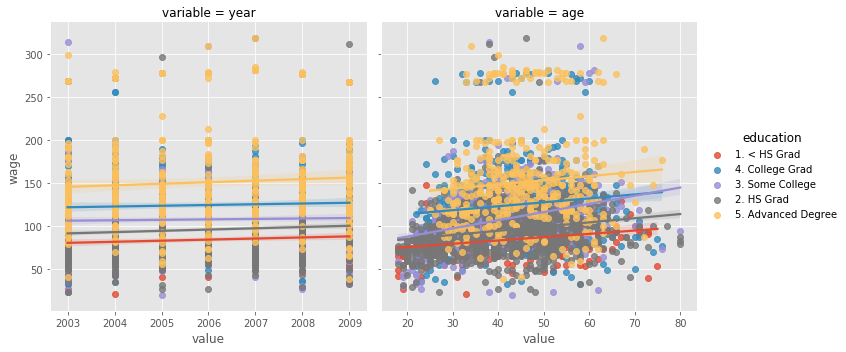

In [27]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='education', data=df_melt, sharex=False)


## ----------------------------------------------------------------------

In [28]:
df = pd.read_csv('smarket.csv')

In [29]:
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [30]:
df_melt = pd.melt(df, id_vars='Direction', value_vars=['Lag1', 'Lag2', 'Lag3'], var_name='Lag Type', value_name='Pct change')

In [31]:
df_melt

,Direction,Lag Type,Pct change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614
...,...,...,...
3745,Up,Lag3,-0.024
3746,Down,Lag3,0.252
3747,Up,Lag3,0.422
3748,Down,Lag3,0.043


C:\Users\lamtr\AppData\Local\Continuum\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


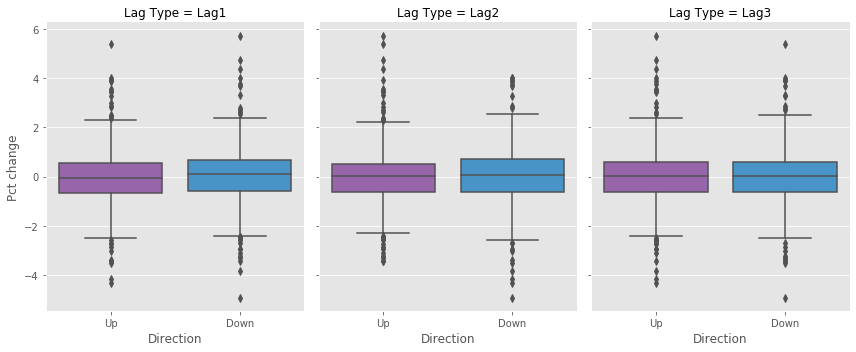

In [32]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

s = sns.FacetGrid(df_melt, col='Lag Type', height=5, aspect=0.8)
s.map(sns.boxplot, 'Direction', 'Pct change', orient="v", palette=flatui)

C:\Users\lamtr\AppData\Local\Continuum\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


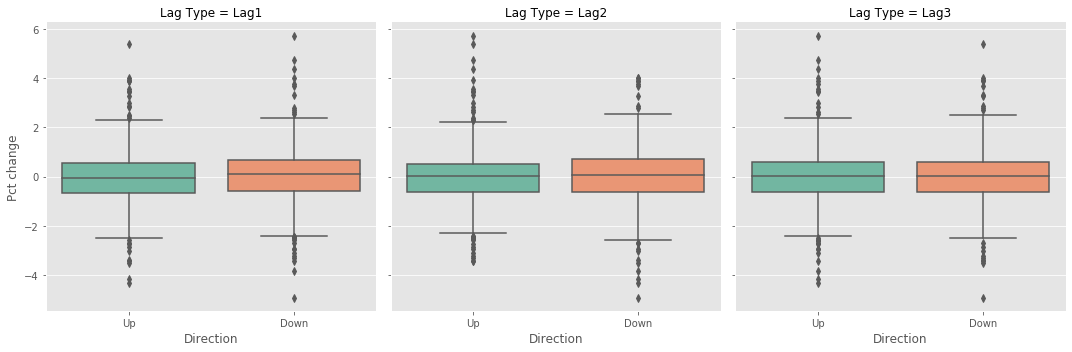

In [33]:
sns.factorplot(x='Direction', y='Pct change', col='Lag Type', data=df_melt, kind='box',palette='Set2')

C:\Users\lamtr\AppData\Local\Continuum\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lamtr\AppData\Local\Continuum\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


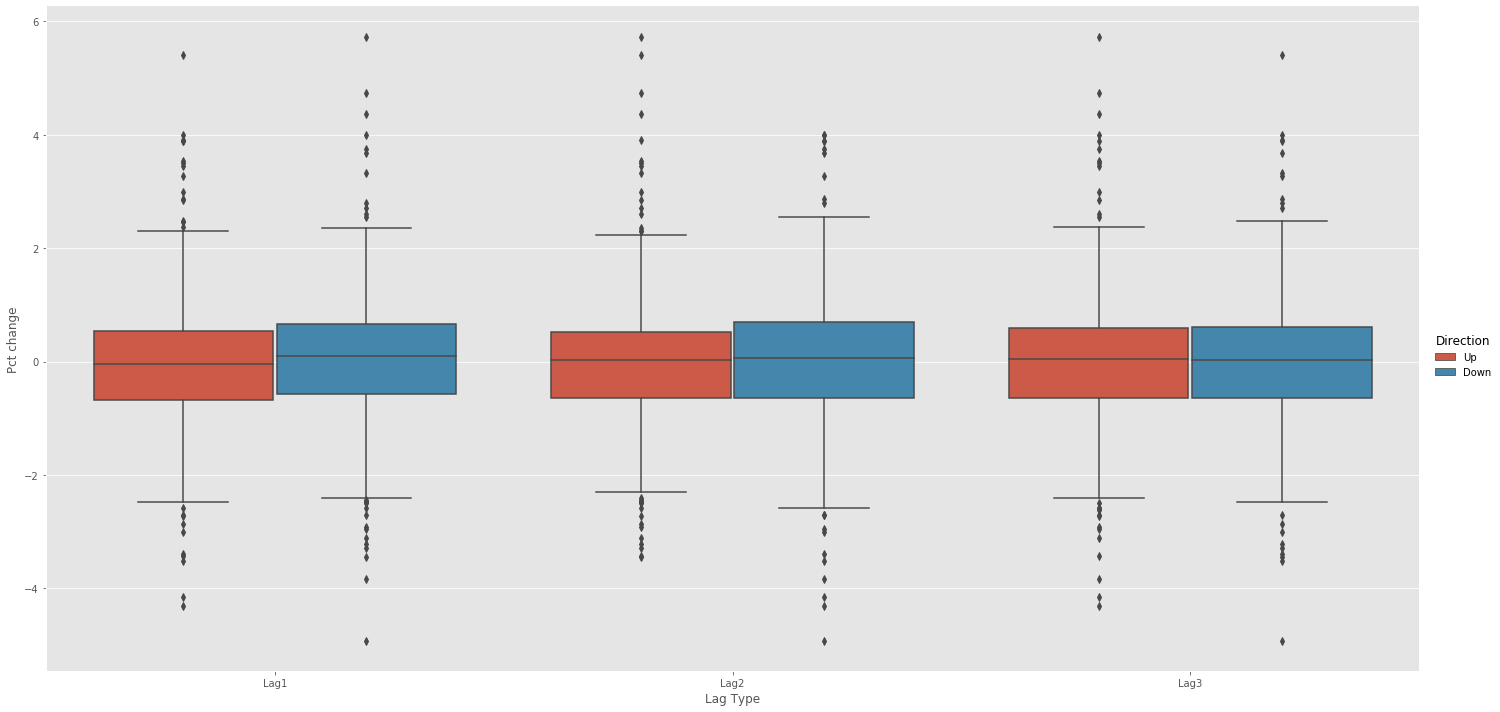

In [34]:
sns.factorplot(x='Lag Type', y='Pct change', hue='Direction', data=df_melt, kind='box', size=10, aspect=2)

## ---------

In [35]:
df_genes = pd.read_csv('nci60_data.csv', index_col=0)

In [36]:
df_genes

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400020,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275020,...,-0.560020,0.200000,0.290000,-0.035000,0.279980,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160019,-0.120000,0.850000,-0.125000,0.779981,0.390000,0.000000,0.160000,2.030000,3.940000
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889981,-0.420000,-0.460000,-0.855000,-0.160019,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [37]:
pca = PCA(2)

In [38]:
df_genes_transformed = pca.fit_transform(df_genes)

In [39]:
df = pd.DataFrame(df_genes_transformed, columns=['PC1', 'PC2'])

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(4) 

In [42]:
kmeans.fit(df_genes_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
df['cluster'] = kmeans.labels_

C:\Users\lamtr\AppData\Local\Continuum\anaconda3\envs\tensorflow_session\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


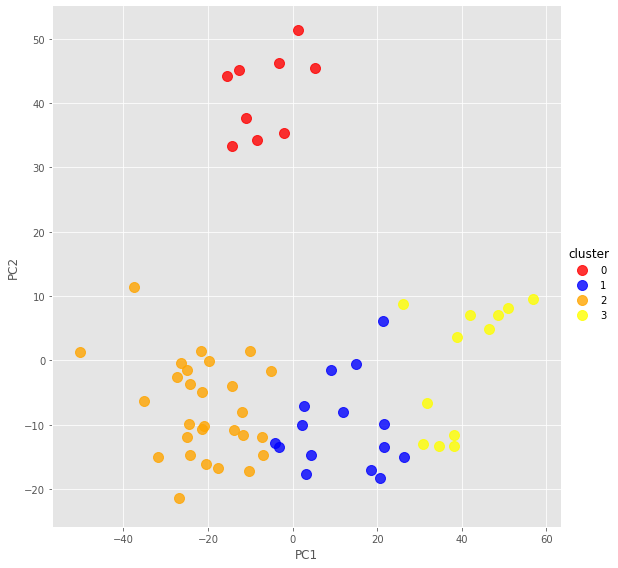

In [44]:
sns.lmplot(x='PC1', y='PC2', hue='cluster', palette=['red','blue','orange','yellow'], data=df, fit_reg=False, size=8, scatter_kws={'s':100})

In [45]:
kmeans.transform(df_genes_transformed).shape

(64, 4)

In [46]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Chapter 2

In [47]:
pd.read_csv??

In [48]:
df_adv = pd.read_csv('advertising.csv', index_col=0) 

In [49]:
df_adv

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [50]:
pd.melt??

In [51]:
df_adv_melt = pd.melt(df_adv, id_vars=['Sales'], value_vars=['TV', 'Radio', 'Newspaper'], value_name='adv_budget')

In [52]:
df_adv_melt

,Sales,variable,adv_budget
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8
...,...,...,...
595,7.6,Newspaper,13.8
596,9.7,Newspaper,8.1
597,12.8,Newspaper,6.4
598,25.5,Newspaper,66.2


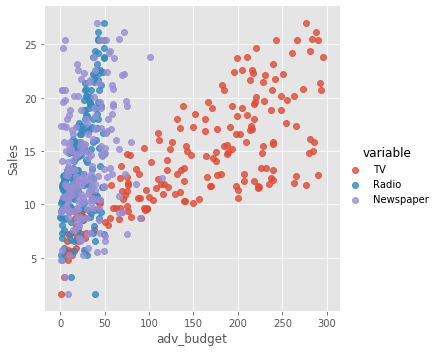

In [53]:
sns.lmplot(x='adv_budget', y='Sales', data=df_adv_melt, hue='variable', fit_reg=False)

In [54]:
plt.style.use("ggplot")

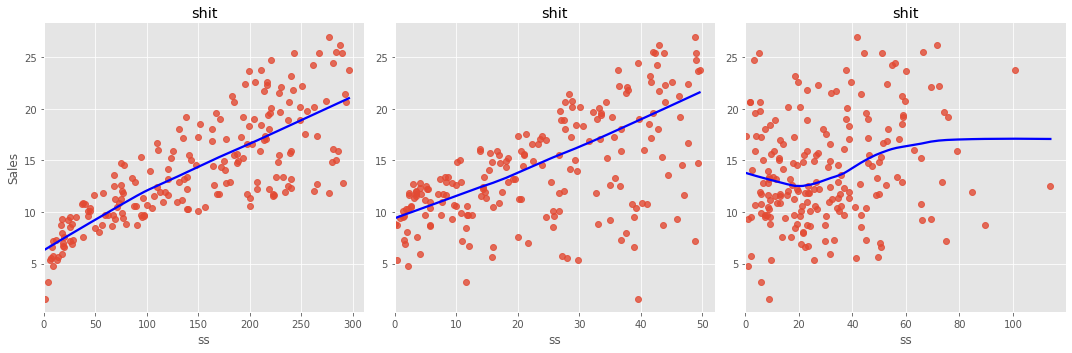

In [55]:
plot = sns.lmplot(x='adv_budget', 
                  y='Sales', 
                  data=df_adv_melt, 
                  col='variable', 
                  sharex = False, 
                  sharey= False, 
                  fit_reg=True, 
                  palette=['red'], 
                  ci=0, 
                  line_kws={'color':'blue'},
                 lowess=True)
for i, ax in enumerate(plot.axes[0]):
    ax.set_xlim(0,)
    ax.set_title('shit')
    ax.set_xlabel('ss')

In [56]:
for i in plot.axes[0]:
    i.set_xlim(0,)

In [57]:
plot

In [58]:
dir(plot)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bottom_axes',
 '_clean_axis',
 '_col_var',
 '_col_wrap',
 '_colors',
 '_dropna',
 '_facet_color',
 '_facet_plot',
 '_finalize_grid',
 '_get_palette',
 '_hue_var',
 '_inner_axes',
 '_left_axes',
 '_legend',
 '_legend_data',
 '_legend_out',
 '_margin_titles',
 '_n_facets',
 '_ncol',
 '_not_bottom_axes',
 '_not_left_axes',
 '_not_na',
 '_nrow',
 '_row_var',
 '_update_legend_data',
 '_x_var',
 '_y_var',
 'add_legend',
 'ax',
 'axes',
 'col_names',
 'data',
 'despine',
 'facet_axis',
 'facet_data',
 'fig',
 'hue_kws',
 'hue_names',
 'map',
 'map_dataframe',
 'row_names',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',

In [59]:
num_points = 30

np.random.seed(12345)
x = np.linspace(1,13, num_points).reshape(-1, 1)
error = np.random.randn(num_points, 1) * num_points
f = lambda x: (x - 2) * (x - 6) * (x - 12)
y = f(x) + error


In [60]:
np.linspace(1,13, num_points)

array([ 1.        ,  1.4137931 ,  1.82758621,  2.24137931,  2.65517241,
        3.06896552,  3.48275862,  3.89655172,  4.31034483,  4.72413793,
        5.13793103,  5.55172414,  5.96551724,  6.37931034,  6.79310345,
        7.20689655,  7.62068966,  8.03448276,  8.44827586,  8.86206897,
        9.27586207,  9.68965517, 10.10344828, 10.51724138, 10.93103448,
       11.34482759, 11.75862069, 12.17241379, 12.5862069 , 13.        ])

In [61]:
error

array([[-6.14122978e+00],
       [ 1.43683001e+01],
       [-1.55831615e+01],
       [-1.66719091e+01],
       [ 5.89734172e+01],
       [ 4.18021750e+01],
       [ 2.78723630e+00],
       [ 8.45238458e+00],
       [ 2.30706770e+01],
       [ 3.73930421e+01],
       [ 3.02156807e+01],
       [-3.88866333e+01],
       [ 8.24974900e+00],
       [ 6.86738637e+00],
       [ 4.05875051e+01],
       [ 2.65928802e+01],
       [-6.00491193e+01],
       [-1.11552761e+01],
       [ 5.00707593e+01],
       [-1.31570921e+01],
       [-1.61922434e+01],
       [ 1.43095503e+01],
       [ 9.74683176e+01],
       [-3.06368257e+01],
       [-1.73126191e+01],
       [ 3.72363827e+00],
       [ 9.07840686e+00],
       [ 1.57131620e+01],
       [ 2.82083333e-02],
       [ 4.03142938e+01]])

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [97]:
poly = PolynomialFeatures(degree=10, include_bias=True, order='C')
X = poly.fit_transform(x)

In [98]:
poly

PolynomialFeatures(degree=10, include_bias=True, interaction_only=False,
                   order='C')

In [99]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3',
 'x0^4',
 'x0^3 x1',
 'x0^2 x1^2',
 'x0 x1^3',
 'x1^4',
 'x0^5',
 'x0^4 x1',
 'x0^3 x1^2',
 'x0^2 x1^3',
 'x0 x1^4',
 'x1^5',
 'x0^6',
 'x0^5 x1',
 'x0^4 x1^2',
 'x0^3 x1^3',
 'x0^2 x1^4',
 'x0 x1^5',
 'x1^6',
 'x0^7',
 'x0^6 x1',
 'x0^5 x1^2',
 'x0^4 x1^3',
 'x0^3 x1^4',
 'x0^2 x1^5',
 'x0 x1^6',
 'x1^7',
 'x0^8',
 'x0^7 x1',
 'x0^6 x1^2',
 'x0^5 x1^3',
 'x0^4 x1^4',
 'x0^3 x1^5',
 'x0^2 x1^6',
 'x0 x1^7',
 'x1^8',
 'x0^9',
 'x0^8 x1',
 'x0^7 x1^2',
 'x0^6 x1^3',
 'x0^5 x1^4',
 'x0^4 x1^5',
 'x0^3 x1^6',
 'x0^2 x1^7',
 'x0 x1^8',
 'x1^9',
 'x0^10',
 'x0^9 x1',
 'x0^8 x1^2',
 'x0^7 x1^3',
 'x0^6 x1^4',
 'x0^5 x1^5',
 'x0^4 x1^6',
 'x0^3 x1^7',
 'x0^2 x1^8',
 'x0 x1^9',
 'x1^10']

In [100]:
np.random.seed(0)
shuffle_index = np.random.permutation(30)
rand_train = shuffle_index[:int(num_points * 0.7)]
rand_test = shuffle_index[int(num_points * 0.7):]
X_train = X[rand_train]
y_train = y[rand_train]
X_test = X[rand_test]
y_test = y[rand_test]

In [101]:
rand_test

array([19,  9,  7, 25,  3,  0, 21, 15, 12])

In [102]:
shuffle_index

array([ 2, 28, 13, 10, 26, 24, 27, 11, 17, 22,  5, 16,  8, 14, 23, 20,  1,
       29,  6,  4, 18, 19,  9,  7, 25,  3,  0, 21, 15, 12])

In [103]:
np.random.seed(0)
shuffle_index = np.random.permutation(30)
shuffle_index

array([ 2, 28, 13, 10, 26, 24, 27, 11, 17, 22,  5, 16,  8, 14, 23, 20,  1,
       29,  6,  4, 18, 19,  9,  7, 25,  3,  0, 21, 15, 12])

In [104]:
linreg = LinearRegression()

In [105]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
linreg.score(X_train, y_train)

1.0

In [107]:
linreg.score(X_test, y_test)

-11332.75000303661

In [108]:
linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [109]:
linreg.coef_

array([[-1.52471884e-08,  8.65100781e+02,  1.65564947e+03,
         3.16946318e+04, -1.85416794e+04,  5.11625528e+03,
        -7.38725827e+04, -1.62809346e+04,  2.08396870e+04,
        -5.71757901e+03,  3.78609597e+04, -3.68978408e+04,
         9.87925769e+03,  1.92719728e+04, -8.46561641e+03,
         3.82770975e+04,  1.66754049e+04,  5.35755855e+02,
         1.80619272e+04, -2.41261115e+02, -4.19249219e+03,
         6.23072636e+03,  1.08174283e+04,  1.20874191e+04,
         1.27470596e+04,  1.41461532e+04, -1.82523886e+04,
         1.92312206e+03, -1.39078093e+04, -2.28264070e+03,
        -3.00197605e+03,  5.70898295e+03,  1.29480999e+04,
         8.66057907e+03, -2.74017679e+04,  7.03907022e+03,
        -1.72441395e+04, -2.30408300e+03, -1.22725289e+04,
        -1.14733427e+04,  2.71782163e+01,  1.04434176e+04,
         6.26192815e+03, -2.75913446e+04,  1.01887050e+04,
        -9.96549016e+03,  9.00607987e+03, -8.46607176e+03,
        -1.84439724e+04, -1.55017066e+04, -3.30148902e+0

In [110]:
linreg.intercept_

array([-830.70946231])

In [112]:
linreg = LinearRegression()
linreg.fit(X_train[:, :2], y_train)
y_train2 = linreg.predict(X_train[:, :2])
y_test2 = linreg.predict(X_test[:, :2])
linreg.fit(X_train[:, :4], y_train)
y_train_4 = linreg.predict(X_train[:, :4])
y_test_4 = linreg.predict(X_test[:, :4])


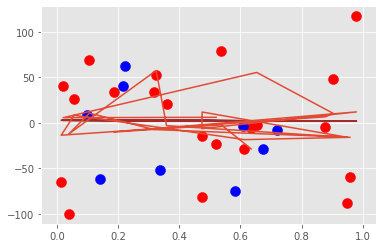

In [121]:
plt.scatter(X_train[:, 1], y_train, c='r', s=100, label='Train')
plt.scatter(X_test[:, 1], y_test, c='b', s=100, label='Test')
plt.plot(X_train[:, 1], y_train2, c='brown')
plt.plot(X_train[:, 1], y_train_4)

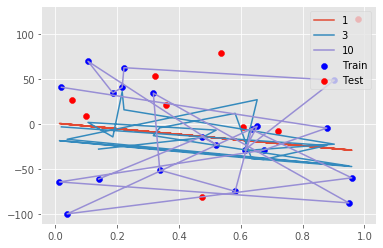

In [124]:
poly = PolynomialFeatures(degree=10)
X = poly.fit_transform(x)
obs_nums = np.arange(0, num_points)
np.random.shuffle(obs_nums)

top_70 = int(num_points * .7)
rand_train = np.sort(obs_nums[:top_70])
rand_test = np.sort(obs_nums[top_70:])
X_train = X[rand_train]
X_test = X[rand_test]
y_train = y[rand_train]
y_test = y[rand_test]
linreg = LinearRegression()
linreg.fit(X_train[:, :2], y_train)
y_train_2 = linreg.predict(X_train[:, :2])
y_test_2 = linreg.predict(X_test[:, :2])

linreg.fit(X_train[:, :4], y_train)
y_train_4 = linreg.predict(X_train[:, :4])
y_test_4 = linreg.predict(X_test[:, :4])

linreg.fit(X_train, y_train)
y_train_10 = linreg.predict(X_train)
y_test_10 = linreg.predict(X_test)

plt.scatter(X_train[:,1], y_train, c='b', label='Train')
plt.scatter(X_test[:,1], y_test, c='r', label = 'Test')
plt.plot(X_train[:,1], y_train_2, label = '1')
plt.plot(X_train[:,1], y_train_4, label = '3')
plt.plot(X_train[:,1], y_train_10, label = '10')
plt.legend(loc=1);

In [125]:
from sklearn.metrics import mean_squared_error

In [149]:
error_2 = mean_squared_error(y_train, y_train_2)
error_4 = mean_squared_error(y_train, y_train_4)
error_10 = mean_squared_error(y_train, y_train_10)
a= np.array([error_2, error_4, error_10])

In [150]:
error_train = np.column_stack((np.array([2, 4, 10]), a))

In [151]:
error_2 = mean_squared_error(y_test, y_test_2)
error_4 = mean_squared_error(y_test, y_test_4)
error_10 = mean_squared_error(y_test, y_test_10)

In [154]:
error_test = np.column_stack((np.array([2, 4, 10]), np.array([error_2, error_4, error_10])))

In [155]:
error_test

array([[2.00000000e+00, 4.59208862e+03],
       [4.00000000e+00, 4.51097975e+03],
       [1.00000000e+01, 8.54437255e+05]])

In [158]:
error_train

array([[2.00000000e+00, 2.43312148e+03],
       [4.00000000e+00, 2.03858887e+03],
       [1.00000000e+01, 4.87984262e-22]])

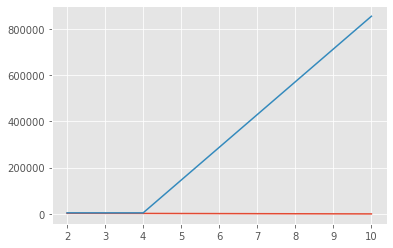

In [160]:
plt.plot(error_train[:, 0], error_train[:, 1], label='train')
plt.plot(error_test[:, 0], error_test[:, 1], label='test')
plt.plot()

In [10]:
import math
x = np.linspace(1, 50, num = 50)

In [11]:

import matplotlib.cm as cm
import matplotlib.mlab as mlab
y = x
X, Y = np.meshgrid(x,y)

In [12]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [13]:
X

array([[ 1.,  2.,  3., ..., 48., 49., 50.],
       [ 1.,  2.,  3., ..., 48., 49., 50.],
       [ 1.,  2.,  3., ..., 48., 49., 50.],
       ...,
       [ 1.,  2.,  3., ..., 48., 49., 50.],
       [ 1.,  2.,  3., ..., 48., 49., 50.],
       [ 1.,  2.,  3., ..., 48., 49., 50.]])

In [14]:
Y

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  2.,  2.,  2.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       ...,
       [48., 48., 48., ..., 48., 48., 48.],
       [49., 49., 49., ..., 49., 49., 49.],
       [50., 50., 50., ..., 50., 50., 50.]])

In [15]:
import matplotlib.cm as cm
import matplotlib.mlab as mlab
y = x
X, Y = np.meshgrid(x,y)

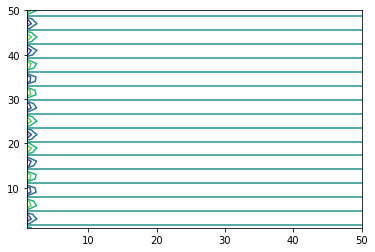

In [17]:
f = np.cos(Y)/(1 + np.square(X))
CS = plt.contour(X, Y, f)
plt.show()

In [3]:
bias = np.array([6, 4, 2, 1, .5, .1])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([7, 5, 2, 2, 5, 7])
irreducible_error = np.ones(6) * 1.5

In [4]:
df = pd.DataFrame({'bias': bias, 'variance': variance, 'training_error': training_error, 'test_error': test_error, 'ir_error': irreducible_error})

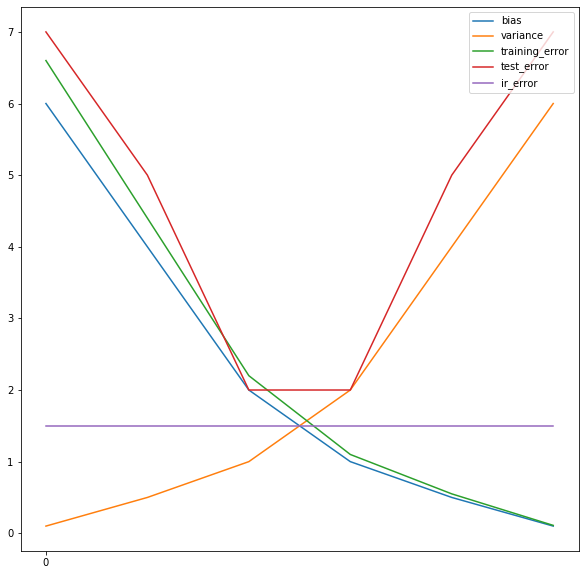

In [23]:
a = df.plot(figsize=(10, 10))
a.legend(loc=1)
a.set_xticks([0])

In [58]:
df_7 = pd.DataFrame({'x1': [0, 2, 0, 0, -1, 1], 'x2':[3, 0, 1, 1, 0, 1], 'x3':[0, 0, 3, 2, 1, 1], 
                     'y':['R', 'R', 'R', 'G', 'G', 'R']})
df_7

,x1,x2,x3,y
0,0,3,0,R
1,2,0,0,R
2,0,1,3,R
3,0,1,2,G
4,-1,0,1,G
5,1,1,1,R


In [59]:
df= (df_7.iloc[:, :3].values  - np.array([0, 0, 0]))**2

In [60]:
df

array([[0, 9, 0],
       [4, 0, 0],
       [0, 1, 9],
       [0, 1, 4],
       [1, 0, 1],
       [1, 1, 1]], dtype=int64)

In [50]:
df = df.sum(axis=1).astype('float')

In [51]:
df

0     9.0
1     4.0
2    10.0
3     5.0
4     2.0
5     3.0
dtype: float64

In [52]:
a = np.sqrt(df)
a

0    3.000000
1    2.000000
2    3.162278
3    2.236068
4    1.414214
5    1.732051
dtype: float64

In [46]:
np.sqrt(df).array

<PandasArray>
[3.0, 2.0, 3.1622777, 2.236068, 1.4142135, 1.7320508]
Length: 6, dtype: float32

In [47]:
dist = (df_7.values[:, :3] - np.array([0, 0, 0])) ** 2

# Sum across the rows and make sure the type is float
summed_distance = dist.sum(axis=1).astype('float')

# Take square root to get euclidean distance
euclidean_dist = np.sqrt(summed_distance)
euclidean_dist

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

In [55]:
df.values

array([ 9.,  4., 10.,  5.,  2.,  3.])

In [54]:
dist

array([[0, 9, 0],
       [4, 0, 0],
       [0, 1, 9],
       [0, 1, 4],
       [1, 0, 1],
       [1, 1, 1]], dtype=object)

In [67]:
np.sort(euclidean_dist)[::-1]

array([3.16227766, 3.        , 2.23606798, 2.        , 1.73205081,
       1.41421356])

In [64]:
np.sort(euclidean_dist)

array([1.41421356, 1.73205081, 2.        , 2.23606798, 3.        ,
       3.16227766])

In [68]:
a = 'fdsfsd'
a[::-1]

'dsfsdf'

In [69]:
df = pd.read_csv('College.csv')

In [71]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [76]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

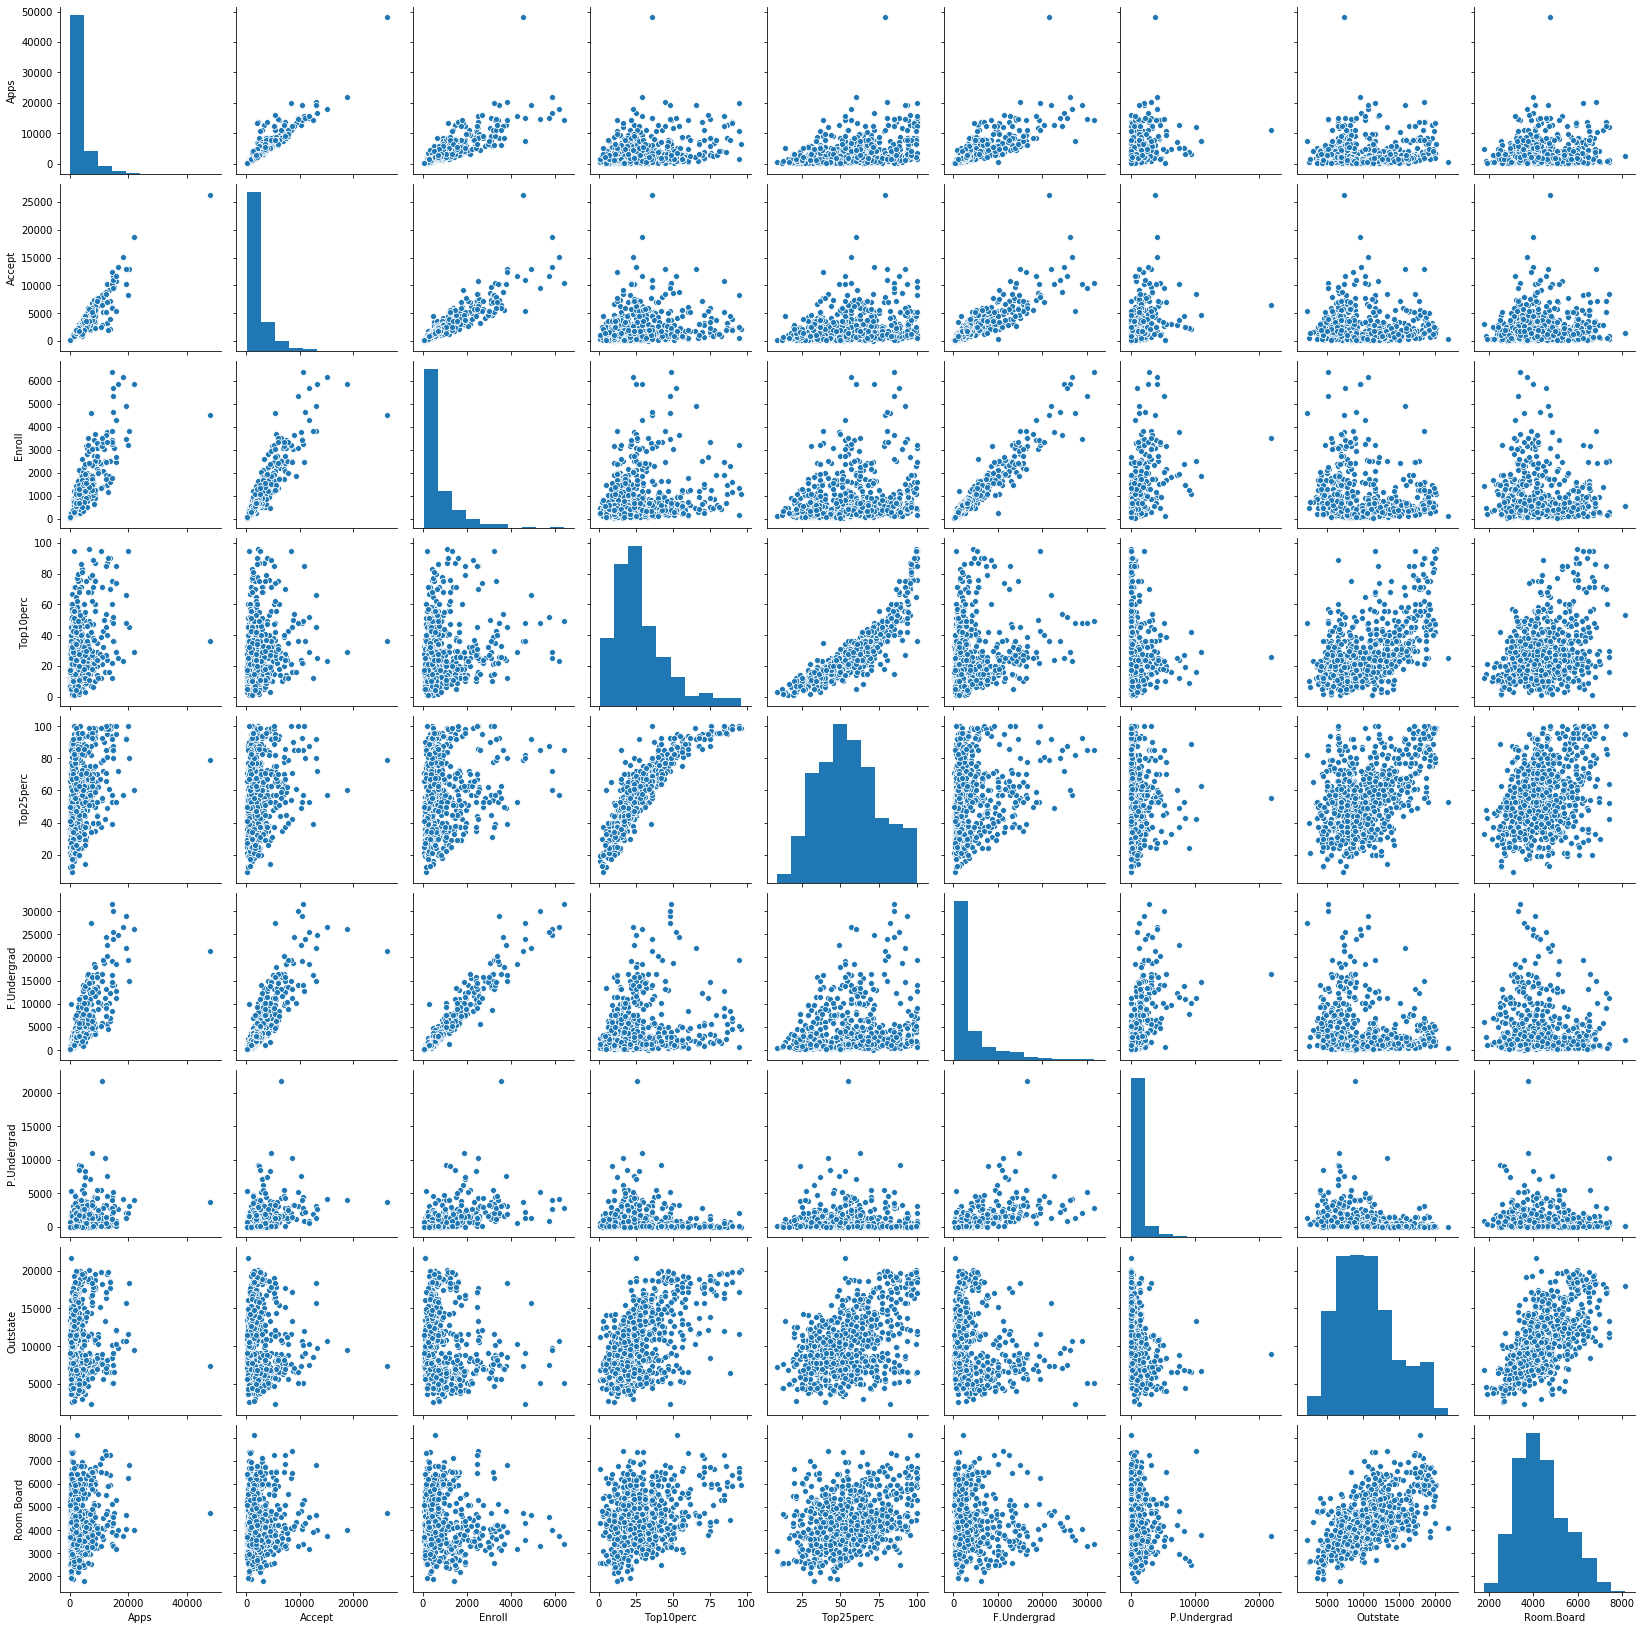

In [82]:
sns.pairplot(df.iloc[:, :10])

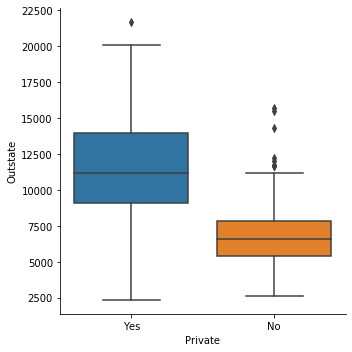

In [85]:
sns.catplot(x='Private', y='Outstate', kind='box', data=df)

In [88]:
df['Elite'] = np.where(df['Top10perc'] > 50, 'Yes', 'No')

In [89]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes


In [92]:
df['Elite'].sort_values(ascending=False)

708    Yes
60     Yes
144    Yes
609    Yes
606    Yes
      ... 
498     No
497     No
496     No
495     No
0       No
Name: Elite, Length: 777, dtype: object

In [95]:
df.groupby(by='Elite')['Outstate'].sum()

Elite
No     6923012
Yes    1189388
Name: Outstate, dtype: int64

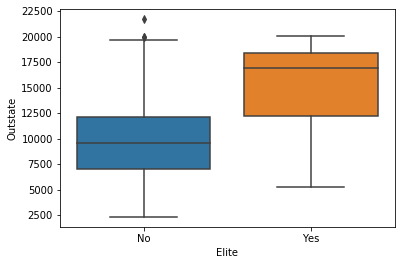

In [97]:
sns.boxplot(x='Elite', y='Outstate', data=df)

In [108]:
plt.style.use('ggplot')

(array([603., 109.,  40.,  14.,   7.,   2.,   0.,   1.,   0.,   1.]),
 array([   72. ,  2697.8,  5323.6,  7949.4, 10575.2, 13201. , 15826.8,
        18452.6, 21078.4, 23704.2, 26330. ]),
 <a list of 10 Patch objects>)

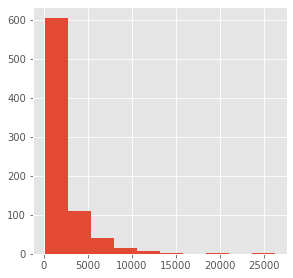

In [110]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(221)
ax.hist(df['Accept'], bins=10)


Text(0.5, 1.0, 'Percentage Accepted')

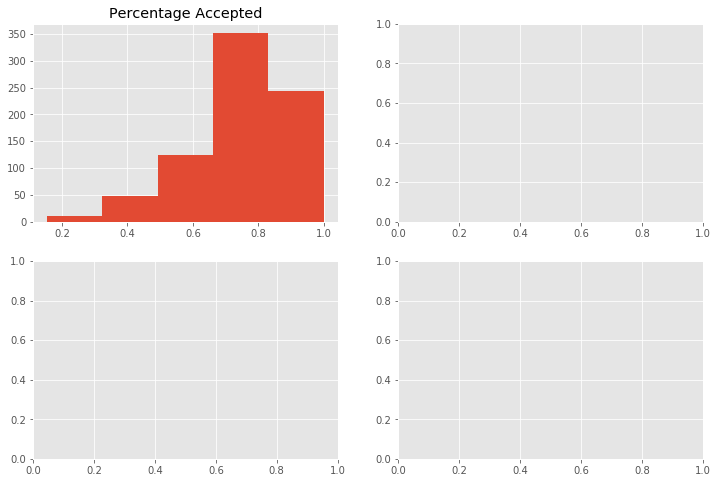

In [111]:
fig , ax = plt.subplots(2, 2, figsize=(12,8))
ax[0, 0].hist(df['Accept'] / df['Apps'] , bins=5)
ax[0, 0].set_title('Percentage Accepted')

In [112]:
df = pd.read_csv('Auto.csv')

In [113]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [117]:
df.dropna??

In [119]:
df.var()

mpg                 60.918142
cylinders            2.909696
displacement     10950.367554
horsepower        1481.569393
weight          721484.709008
acceleration         7.611331
year                13.569915
origin               0.648860
dtype: float64

In [120]:
df.mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64

In [121]:
df.std()

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
origin            0.805518
dtype: float64

In [124]:
range(df['displacement'])

TypeError: 'Series' object cannot be interpreted as an integer